### <span style='color: blue'> **_Unveiling Ethereum's Price Dynamics: A Time Series Analysis and Forecasting_**</span>

__Author__: _HACINI Ahmed Djalal_

#### Abstract
This study investigates the price movements of Ethereum, a prominent cryptocurrency, using time series analysis. We leverage a comprehensive dataset encompassing Ethereum's closing, opening, high, and low prices for a four-year period (2019-2022) with a 15-minute time interval. Employing ARIMA (Autoregressive Integrated Moving Average) models, we delve into model specification, fitting, and diagnosis. Subsequently, we utilize the chosen ARIMA model to generate forecasts for future Ethereum prices. By analyzing the results, this research aims to shed light on the underlying patterns and trends in Ethereum's price behavior. Furthermore, the forecasting component offers valuable insights for investors, traders, and businesses navigating the dynamic cryptocurrency market.


## Introduction

This project delves into the ever-changing world of **Ethereum prices**. Ethereum, a popular cryptocurrency, has experienced significant fluctuations in value since its inception. Understanding 
these price movements can be crucial for various stakeholders, including investors, traders, and businesses.

To facilitate this analysis, we've compiled a comprehensive **dataset** encompassing Ethereum's price history. This dataset specifically covers the years between __2019-11-27__ and __2022-03-16__, providing a detailed look at price movements over a four-year period.

The dataset offers granular details by capturing price data every __15 minutes__. This high frequency allows for a meticulous examination of even minor price shifts. With a total of __80,587 data points__, the dataset presents a substantial collection for researchers to explore.

Investigating Ethereum's price movements is worthwhile for several reasons. Firstly, understanding price fluctuations can inform investment decisions. By analyzing historical trends and patterns, investors can make more informed choices about buying, selling, or holding Ethereum.

Secondly, examining price movements can benefit businesses that accept Ethereum as payment. Recognizing potential price swings can help them prepare for fluctuations and make informed decisions regarding transactions.

Finally, this data can contribute to the development of more sophisticated trading models and algorithms. By incorporating historical price data, these models can potentially predict future price movements with greater accuracy, aiding traders in navigating the cryptocurrency market.

In essence, this dataset serves as a valuable tool for anyone interested in Ethereum's price behavior. By delving into this data, we can gain valuable insights into the cryptocurrency market and its potential future direction.


    Data Source:
 This dataset is sourced from Kaggle: https://www.kaggle.com/datasets/glebkirichenko/price-ethereum, a public platform for sharing and exploring machine learning datasets.

## Analysis and Model Specification

First, lets load and take a first glance at the data

In [12]:
file_path <- "data/ETHUSDT_PERP_15m.csv"
data <- read.csv(file_path)
head(data)

,dateTime,open,high,low,close,volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019-11-27 14:15:00,148.00,148.08,146.80,147.38,2693.24
2,2019-11-27 14:30:00,147.37,147.66,147.15,147.28,2355.46
3,2019-11-27 14:45:00,147.48,147.66,146.90,147.65,2584.54
4,2019-11-27 15:00:00,147.61,147.98,147.32,147.95,1876.29
5,2019-11-27 15:15:00,147.97,148.71,147.79,148.69,2407.68
6,2019-11-27 15:30:00,148.67,151.39,148.56,151.16,2471.09


We see that the names of the columns that are _Close, open, high, and low_ refer to the trading price of Ethereum over a specific period.

    Open: The price at which the first Ethereum trade occurred in the chosen timeframe (e.g., today, this week, this month).
    High: The highest price at which Ethereum was traded during the timeframe.
    Low: The lowest price at which Ethereum was traded during the timeframe.
    Close: The price at which the last Ethereum trade occurred within the timeframe.

For the purpose of the analysis, we would like to focus on __Close Price__ so that we can understand the final market sentiment and price after a trading session concludes.

In [19]:
# Keep only close price and timestamp columns and convert it to time series object
eth_data <- data[, c("dateTime", "close")]
eth_data$dateTime <- strptime(eth_data$dateTime, "%Y-%m-%d %H:%M:%S")
head(eth_data)

,dateTime,close
,<dttm>,<dbl>
1,2019-11-27 14:15:00,147.38
2,2019-11-27 14:30:00,147.28
3,2019-11-27 14:45:00,147.65
4,2019-11-27 15:00:00,147.95
5,2019-11-27 15:15:00,148.69
6,2019-11-27 15:30:00,151.16


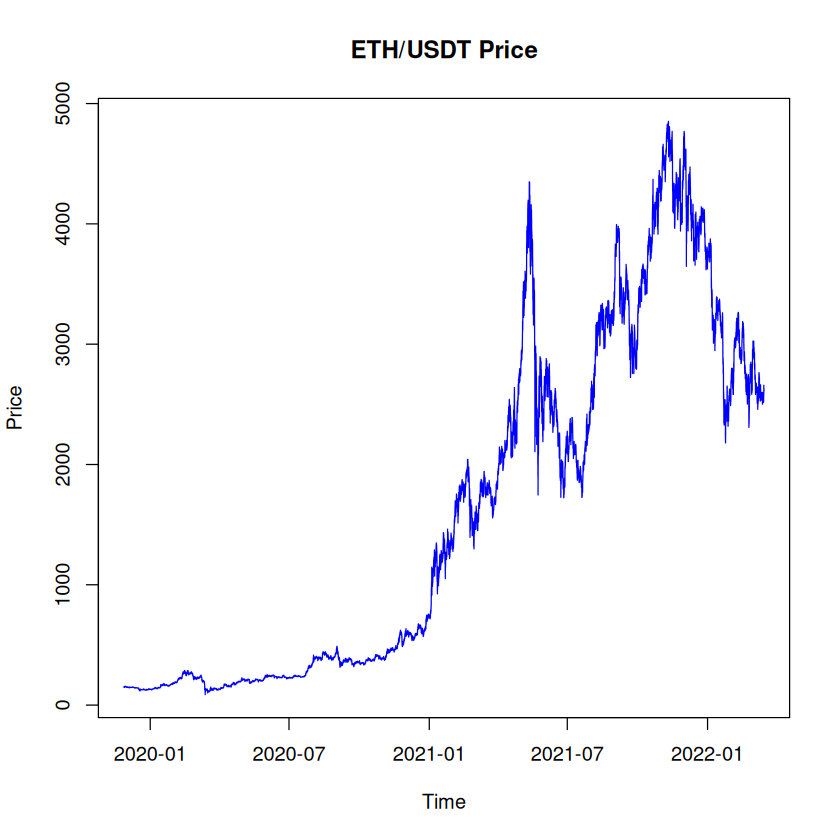

In [24]:
plot(eth_data$dateTime ,eth_data$close, type = "l", xlab = "Time", ylab = "Price", main = "ETH/USDT Price", col="blue")

#### __Interpreting the plot__
The plot displays the price over time, showing significant movements within the intervals. There is an evident upward *__trend__* especially in the middle of the observed period where the price peaks. This *__trend__* suggests that the time series might not be *__stationary__*, as the statistical properties of the series, like the *__mean__* seems to be *__non-constant__* over time. Trend-stationarity would imply that fluctuations around a deterministic trend do not have a unit root, but this does not seem to be the case here (a statistical test will be conducted later).


The *__variance__* appears to be relatively *__small__*, but we haven't yet established if it's *__constant__* throughout the time series. Though, we can see some variation over time, although the changes aren't pronounced. This could suggest that while there is some fluctuation in the variance, it may not be substantial enough to deem the *__heteroscedasticity__*.

#### 

#### __Stationarity__

Since both ACF and PACF assume stationarity of the underlying time series. Staionarity can be checked by performing an *__Augmented Dickey-Fuller (ADF) test__*:

        p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
        p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


In order to check for stationarity, let's define a the following funtion:

In [2]:
setwd('~/Study/TimeSeries/TSA/R')
files <- list.files()
for (file in files) {
  source(file)
}


In [10]:
check_stationarity <- function(data) {
    result <- adf.test(data)
    print(result)
}


In [ ]:
library(forecast)

: 

In [27]:
install.packages("forecast_8.22.0.tar.gz", lib= '')

inferring 'repos = NULL' from 'pkgs'

Warning message in system2(cmd0, args, env = env, stdout = output, stderr = output, :
“error in running command”
Warning message in install.packages("forecast_8.22.0.tar.gz", lib = "."):
“installation of package ‘forecast_8.22.0.tar.gz’ had non-zero exit status”
